# Notebook to make Figs. 3-4 that show velocity gradient tensor and horizontal salinity gradient magnitude statistics. The surface and entire water column are shown separately, with the statistics used to generate Tab. 1 at the end.

In [1]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
import pandas as pd

#Dask
from dask.distributed import Client

client = Client()
client

#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='10m',
                   facecolor='none')

2022-12-28 13:34:18,304 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-k2ew94_b', purging
2022-12-28 13:34:18,304 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-jgg1tae1', purging
2022-12-28 13:34:18,304 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-cxu73pb9', purging
2022-12-28 13:34:18,305 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-138jd9it', purging
2022-12-28 13:34:18,308 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-_8lldvqw', purging
2022-12-28 13:34:18,308 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-pi1ncjeb', purging
2022-12-28 13:34:18,308 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-gri74e8y', purging

# Open histograms of the surface that are unsorted and sorted by $\zeta/f>1$

In [2]:
path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/div_parent_final.nc'
div_parent_surface = xr.open_dataset(path).div_histogram

path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/div_child_final.nc'
div_child_surface = xr.open_dataset(path).div_histogram

path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/rvort_parent_final.nc'
rvort_parent_surface = xr.open_dataset(path).rel_vort_histogram

path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/rvort_child_final.nc'
rvort_child_surface = xr.open_dataset(path).rel_vort_histogram

path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/strain_parent_final.nc'
strain_parent_surface = xr.open_dataset(path).strain_histogram

path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/strain_child_final.nc'
strain_child_surface = xr.open_dataset(path).strain_histogram

path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/sgradmag_parent_final.nc'
sgradmag_parent_surface = xr.open_dataset(path).sgradmag_histogram

path = '/d2/home/dylan/JAMES/histogram_outputs/surface_test/sgradmag_child_final.nc'
sgradmag_child_surface = xr.open_dataset(path).sgradmag_histogram

#Histograms sorted by zeta/f
#----------------

#Divergence
path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/divergence_surface_parent_2010_fronts.nc'
div_hist_fronts_surface = xr.open_dataset(path).div

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/divergence_surface_child_2010_fronts.nc'
div_hist_child_fronts_surface = xr.open_dataset(path).div

#Strain
path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/strain_surface_parent_2010_fronts.nc'
strain_hist_fronts_surface = xr.open_dataset(path).strain

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/strain_surface_child_2010_fronts.nc'
strain_hist_child_fronts_surface = xr.open_dataset(path).strain

#Salinity gradient magnitude - psi points
path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/sgradmag_rho_surface_parent_2010_fronts.nc'
sgradmag_hist_fronts_surface = xr.open_dataset(path).sgradmag

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/sgradmag_rho_surface_child_2010_fronts.nc'
sgradmag_hist_child_fronts_surface = xr.open_dataset(path).sgradmag

# Plot the histograms 

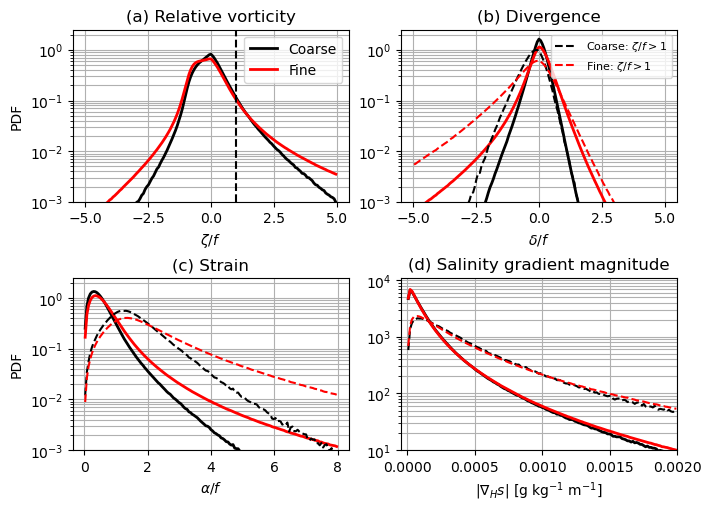

In [3]:
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(2,2, figsize = (7,5), dpi = 100, constrained_layout = True)

ax[0,0].semilogy(rvort_parent_surface.rvort_bin, rvort_parent_surface, lw = 2, color = 'k', label = 'Coarse')
ax[0,0].semilogy(rvort_parent_surface.rvort_bin, rvort_child_surface, lw = 2, color = 'r', label = 'Fine')

ax[0,0].set_title('(a) Relative vorticity')
ax[0,0].set_ylabel('PDF')
ax[0,0].set_xlabel('$\zeta/f$')
ax[0,0].set_xlim(-5.5,5.5)
ax[0,0].set_xticks([-5,-2.5,0,2.5,5])
ax[0,0].set_ylim(10**-3, 2.5)
ax[0,0].axvline(x = 1, ls = '--', c = 'k')

ax[0,1].semilogy(div_parent_surface.divergence_bin, div_parent_surface, lw = 2, color = 'k')
ax[0,1].semilogy(div_parent_surface.divergence_bin, div_child_surface, lw = 2, color = 'r')
ax[0,1].semilogy(div_hist_fronts_surface.divergence_bin, div_hist_fronts_surface, color = 'k', ls = '--', label = r'Coarse: $\zeta/f>1$')
ax[0,1].semilogy(div_hist_fronts_surface.divergence_bin, div_hist_child_fronts_surface, color = 'r', ls = '--', label = r'Fine: $\zeta/f>1$')
ax[0,1].set_title('(b) Divergence')
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('$\delta/f$')
ax[0,1].set_ylim(10**-3, 2.5)
ax[0,1].legend(loc = 'best', fontsize = 8)
ax[0,1].set_xlim(-5.5,5.5)
ax[0,1].set_xticks([-5,-2.5,0,2.5,5])
ax[0,1].set_ylim(10**-3, 2.5)

ax[1,0].semilogy(strain_parent_surface.strain_bin, strain_parent_surface, lw = 2, color = 'k')
ax[1,0].semilogy(strain_parent_surface.strain_bin, strain_child_surface, lw = 2, color = 'r')
ax[1,0].semilogy(strain_hist_fronts_surface.strain_bin, strain_hist_fronts_surface, color = 'k', ls = '--')
ax[1,0].semilogy(strain_hist_fronts_surface.strain_bin, strain_hist_child_fronts_surface, color = 'r', ls = '--')
ax[1,0].set_title('(c) Strain')
ax[1,0].set_ylabel('PDF')
ax[1,0].set_xlabel(r'$\alpha/f$')
# ax[1,0].set_xticks([0, 1, 2, 3, 4, 5, 6])
# ax[1,0].set_ylim(10**-3.5, 2)
ax[1,0].set_ylim(10**-3, 2.5)

ax[1,1].semilogy(sgradmag_parent_surface.sgradmag_bin, sgradmag_parent_surface, lw = 2, color = 'k', label = 'Parent')
ax[1,1].semilogy(sgradmag_parent_surface.sgradmag_bin, sgradmag_child_surface, lw = 2, color = 'r', label = 'Child')
ax[1,1].semilogy(sgradmag_hist_fronts_surface.sgradmag_bin, sgradmag_hist_fronts_surface, color = 'k', ls = '--')
ax[1,1].semilogy(sgradmag_hist_fronts_surface.sgradmag_bin, sgradmag_hist_child_fronts_surface, color = 'r', ls = '--')
ax[1,1].set_ylabel('')

ax[1,1].set_title('(d) Salinity gradient magnitude')
ax[1,1].set_xlabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')
ax[1,1].set_ylim(10, 11000)
ax[1,1].set_xlim(-.00005, 0.002)

ax[0,0].legend()

for i in range(2):
    for j in range(2):
        ax[i,j].grid()
        ax[i,j].yaxis.grid(True, which='minor')
# ax[1,1].yaxis.grid(True, which='minor')
# plt.savefig('/d2/home/dylan/JAMES/figures/draft1/surface_pdfs_fronts.jpg', dpi = 300, bbox_inches='tight')

# Repeat for the entire water column 

In [4]:
path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/divergence_whole_parent_2010_test.nc'
div_parent_whole = xr.open_dataset(path).div

path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/divergence_whole_child_2010_test.nc'
div_child_whole = xr.open_dataset(path).div

path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/rvort_whole_parent_2010_test.nc'
rvort_parent_whole = xr.open_dataset(path).rvort

path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/rvort_whole_child_2010_test.nc'
rvort_child_whole = xr.open_dataset(path).rvort

path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/strain_whole_parent_2010_test.nc'
strain_parent_whole = xr.open_dataset(path).strain

path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/strain_whole_child_2010_test.nc'
strain_child_whole = xr.open_dataset(path).strain

path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/sgradmag_rho_whole_parent_2010_test.nc'
sgradmag_parent_whole = xr.open_dataset(path).sgradmag

path = '/d2/home/dylan/JAMES/histogram_outputs/whole_test/sgradmag_rho_whole_child_2010_test.nc'
sgradmag_child_whole = xr.open_dataset(path).sgradmag

#Histograms sorted by zeta/f
#----------------
path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/divergence_whole_parent_2010_fronts.nc'
div_parent_front_whole = xr.open_dataset(path).div

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/divergence_whole_child_2010_fronts.nc'
div_child_front_whole = xr.open_dataset(path).div

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/strain_whole_parent_2010_fronts.nc'
strain_parent_front_whole = xr.open_dataset(path).strain

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/strain_whole_child_2010_fronts.nc'
strain_child_front_whole = xr.open_dataset(path).strain

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/sgradmag_rho_whole_parent_2010_fronts.nc'
sgradmag_parent_front_whole = xr.open_dataset(path).sgradmag

path = '/d2/home/dylan/JAMES/histogram_outputs/fronts/sgradmag_rho_whole_child_2010_fronts.nc'
sgradmag_child_front_whole = xr.open_dataset(path).sgradmag

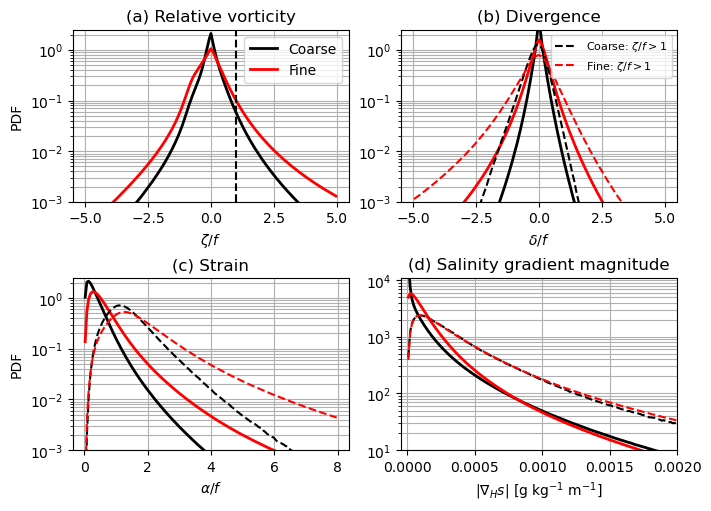

In [5]:
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(2,2, figsize = (7,5), dpi = 100, constrained_layout = True)

ax[0,0].semilogy(rvort_parent_whole.rvort_bin, rvort_parent_whole, lw = 2, color = 'k', label = 'Coarse')
ax[0,0].semilogy(rvort_parent_whole.rvort_bin, rvort_child_whole, lw = 2, color = 'r', label = 'Fine')

ax[0,0].set_title('(a) Relative vorticity')
ax[0,0].set_ylabel('PDF')
ax[0,0].set_xlabel('$\zeta/f$')
ax[0,0].set_xlim(-5.5,5.5)
ax[0,0].set_xticks([-5,-2.5,0,2.5,5])
ax[0,0].set_ylim(10**-3, 2.5)
ax[0,0].axvline(x = 1, ls = '--', c = 'k')

ax[0,1].semilogy(div_parent_whole.divergence_bin, div_parent_whole, lw = 2, color = 'k')
ax[0,1].semilogy(div_parent_whole.divergence_bin, div_child_whole, lw = 2, color = 'r')
ax[0,1].semilogy(div_parent_front_whole.divergence_bin, div_parent_front_whole, color = 'k', ls = '--', label = r'Coarse: $\zeta/f>1$')
ax[0,1].semilogy(div_child_front_whole.divergence_bin, div_child_front_whole, color = 'r', ls = '--', label = r'Fine: $\zeta/f>1$')
ax[0,1].set_title('(b) Divergence')
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('$\delta/f$')
ax[0,1].set_ylim(10**-3, 2.5)
ax[0,1].legend(loc = 'best', fontsize = 8)
ax[0,1].set_xlim(-5.5,5.5)
ax[0,1].set_xticks([-5,-2.5,0,2.5,5])
ax[0,1].set_ylim(10**-3, 2.5)

ax[1,0].semilogy(strain_parent_whole.strain_bin, strain_parent_whole, lw = 2, color = 'k')
ax[1,0].semilogy(strain_parent_whole.strain_bin, strain_child_whole, lw = 2, color = 'r')
ax[1,0].semilogy(strain_parent_front_whole.strain_bin, strain_parent_front_whole, color = 'k', ls = '--')
ax[1,0].semilogy(strain_child_front_whole.strain_bin, strain_child_front_whole, color = 'r', ls = '--')
ax[1,0].set_title('(c) Strain')
ax[1,0].set_ylabel('PDF')
ax[1,0].set_xlabel(r'$\alpha/f$')
# ax[1,0].set_xticks([0, 1, 2, 3, 4, 5, 6])
# ax[1,0].set_ylim(10**-3.5, 2)
ax[1,0].set_ylim(10**-3, 2.5)

ax[1,1].semilogy(sgradmag_parent_whole.sgradmag_bin, sgradmag_parent_whole, lw = 2, color = 'k', label = 'Parent')
ax[1,1].semilogy(sgradmag_parent_whole.sgradmag_bin, sgradmag_child_whole, lw = 2, color = 'r', label = 'Child')
ax[1,1].semilogy(sgradmag_parent_front_whole.sgradmag_bin, sgradmag_parent_front_whole, color = 'k', ls = '--')
ax[1,1].semilogy(sgradmag_child_front_whole.sgradmag_bin, sgradmag_child_front_whole, color = 'r', ls = '--')
ax[1,1].set_ylabel('')

ax[1,1].set_title('(d) Salinity gradient magnitude')
ax[1,1].set_xlabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')
ax[1,1].set_ylim(10, 11000)
ax[1,1].set_xlim(-.00005, 0.002)

ax[0,0].legend()

for i in range(2):
    for j in range(2):
        ax[i,j].grid()
        ax[i,j].yaxis.grid(True, which='minor')
# ax[1,1].yaxis.grid(True, which='minor')
# plt.savefig('/d2/home/dylan/JAMES/figures/draft1/whole_pdfs_fronts.jpg', dpi = 300, bbox_inches='tight')

# Examine statistics for the surface and entire water column 

In [6]:
def pearson_skewness(mean, median, std):
    skew = (3*(mean-median))/std
    return skew

divmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_parent_mean.npy')
divmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_parent_median.npy')
divstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_parent_std.npy')
divskewparent = pearson_skewness(divmeanparent, divmedparent, divstdparent)

divmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_child_mean.npy')
divmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_child_median.npy')
divstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_child_std.npy')
divskewchild = pearson_skewness(divmeanchild, divmedchild, divstdchild)

divmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_parent_mean.npy')
divmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_parent_median.npy')
divstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_parent_std.npy')
divskewparentwhole = pearson_skewness(divmeanparentwhole, divmedparentwhole, divstdparentwhole)

divmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_child_mean.npy')
divmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_child_median.npy')
divstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_child_std.npy')
divskewchildwhole = pearson_skewness(divmeanchildwhole, divmedchildwhole, divstdchildwhole)

rvortmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_parent_mean.npy')
rvortmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_parent_median.npy')
rvortstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_parent_std.npy')
rvortskewparent = pearson_skewness(rvortmeanparent, rvortmedparent, rvortstdparent)

rvortmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_child_mean.npy')
rvortmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_child_median.npy')
rvortstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_child_std.npy')
rvortskewchild = pearson_skewness(rvortmeanchild, rvortmedchild, rvortstdchild)

rvortmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_parent_mean.npy')
rvortmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_parent_median.npy')
rvortstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_parent_std.npy')
rvortskewparentwhole = pearson_skewness(rvortmeanparentwhole, rvortmedparentwhole, rvortstdparentwhole)

rvortmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_child_mean.npy')
rvortmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_child_median.npy')
rvortstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_child_std.npy')
rvortskewchildwhole = pearson_skewness(rvortmeanchildwhole, rvortmedchildwhole, rvortstdchildwhole)

strainmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_parent_mean.npy')
strainmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_parent_median.npy')
strainstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_parent_std.npy')
strainskewparent = pearson_skewness(strainmeanparent, strainmedparent, strainstdparent)

strainmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_child_mean.npy')
strainmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_child_median.npy')
strainstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_child_std.npy')
strainskewchild = pearson_skewness(strainmeanchild, strainmedchild, strainstdchild)

strainmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_parent_mean.npy')
strainmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_parent_median.npy')
strainstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_parent_parent_std.npy')
strainskewparentwhole = pearson_skewness(strainmeanparentwhole, strainmedparentwhole, strainstdparentwhole)

strainmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_child_mean.npy')
strainmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_child_median.npy')
strainstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_child_std.npy')
strainskewchildwhole = pearson_skewness(strainmeanchildwhole, strainmedchildwhole, strainstdchildwhole)

sgradmagmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_parent_mean.npy')
sgradmagmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_parent_median.npy')
sgradmagstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_parent_std.npy')
sgradmagskewparent = pearson_skewness(sgradmagmeanparent, sgradmagmedparent, sgradmagstdparent)

sgradmagmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_child_mean.npy')
sgradmagmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_child_median.npy')
sgradmagstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_child_std.npy')
sgradmagskewchild = pearson_skewness(sgradmagmeanchild, sgradmagmedchild, sgradmagstdchild)

sgradmagmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_parent_mean.npy')
sgradmagmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_parent_median.npy')
sgradmagstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_parent_std.npy')
sgradmagskewparentwhole = pearson_skewness(sgradmagmeanparentwhole, sgradmagmedparentwhole, sgradmagstdparentwhole)

sgradmagmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_child_mean.npy')
sgradmagmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_child_median.npy')
sgradmagstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_child_std.npy')
sgradmagskewchildwhole = pearson_skewness(sgradmagmeanchildwhole, sgradmagmedchildwhole, sgradmagstdchildwhole)

In [7]:
print('div: surface med', divmedparent)
print('div: surface std', divstdparent)
print('div: child surface med', divmedchild)
print('div: child surface std', divstdchild)
print('div: whole med', divmedparentwhole)
print('div: whole std', divstdparentwhole)
print('div: child whole med', divmedchildwhole)
print('div: child whole std', divstdchildwhole)
print('div skew: parent', divskewparent)
print('div skew: child', divskewchild)
print('divwhole skew: parent', divskewparentwhole)
print('divwhole skew: child', divskewchildwhole)

print('rvort: surface med', rvortmedparent)
print('rvort: surface std', rvortstdparent)
print('rvort: child surface med', rvortmedchild)
print('rvort: child surface std', rvortstdchild)
print('rvort: whole med', rvortmedparentwhole)
print('rvort: whole std', rvortstdparentwhole)
print('rvort: child whole med', rvortmedchildwhole)
print('rvort: child whole std', rvortstdchildwhole)
print('rvort skew: parent', rvortskewparent)
print('rvort skew: child', rvortskewchild)
print('rvortwhole skew: parent', rvortskewparentwhole)
print('rvortwhole skew: child', rvortskewchildwhole)

print('strain: surface med', strainmedparent)
print('strain: surface std', strainstdparent)
print('strain: child surface med', strainmedchild)
print('strain: child surface std', strainstdchild)
print('strain: whole med', strainmedparentwhole)
print('strain: whole std', strainstdparentwhole)
print('strain: child whole med', strainmedchildwhole)
print('strain: child whole std', strainstdchildwhole)
print('strain skew: parent', strainskewparent)
print('strain skew: child', strainskewchild)
print('strainwhole skew: parent', strainskewparentwhole)
print('strainwhole skew: child', strainskewchildwhole)

print('sgradmag: surface med', sgradmagmedparent*1e4)
print('sgradmag: surface std', sgradmagstdparent*1e4)
print('sgradmag: child surface med', sgradmagmedchild*1e4)
print('sgradmag: child surface std', sgradmagstdchild*1e4)
print('sgradmag: whole med', sgradmagmedparentwhole*1e4)
print('sgradmag: whole std', sgradmagstdparentwhole*1e4)
print('sgradmag: child whole med', sgradmagmedchildwhole*1e4)
print('sgradmag: child whole std', sgradmagstdchildwhole*1e4)
print('sgradmag: skew parent', sgradmagskewparent)
print('sgradmag: skew child', sgradmagskewchild)
print('sgradmagwhole: skew parent', sgradmagskewparentwhole)
print('sgradmagwhole: skew child', sgradmagskewchildwhole)

div: surface med 0.009457865500910849
div: surface std 0.34397266093343876
div: child surface med 0.0345747460011402
div: child surface std 0.6209098535401062
div: whole med 0.00198282000933603
div: whole std 0.250032900827253
div: child whole med 0.007662852636440184
div: child whole std 0.44901649501606766
div skew: parent -0.15359228941014866
div skew: child -0.2060115577111219
divwhole skew: parent -0.0485407234029003
divwhole skew: child -0.06367090457511998
rvort: surface med -0.05380869890087589
rvort: surface std 0.7555153936630277
rvort: child surface med -0.13986768513973485
rvort: child surface std 1.209455850700047
rvort: whole med -0.0020670048744027333
rvort: whole std 0.5645700134491913
rvort: child whole med -0.026115768332987295
rvort: child whole std 0.8458882852555133
rvort skew: parent 0.29620760484118097
rvort skew: child 0.3895046758517654
rvortwhole skew: parent 0.09235333100727583
rvortwhole skew: child 0.144443118555921
strain: surface med 0.4695785314719371
st

In [8]:
def per_change(final, initial):
    perchange = 100*((final-initial)/np.abs(initial))
    return perchange

rvort_surface_pchange = per_change(rvortmedchild, rvortmedparent)
rvort_whole_pchange = per_change(rvortmedchildwhole, rvortmedparentwhole)

div_surface_pchange = per_change(divmedchild, divmedparent)
div_whole_pchange = per_change(divmedchildwhole, divmedparentwhole)

strain_surface_pchange = per_change(strainmedchild, strainmedparent)
strain_whole_pchange = per_change(strainmedchildwhole, strainmedparentwhole)

sgradmag_surface_pchange = per_change(sgradmagmedchild, sgradmagmedparent)
sgradmag_whole_pchange = per_change(sgradmagmedchildwhole, sgradmagmedparentwhole)

print(rvort_surface_pchange)
print(rvort_whole_pchange)
print(div_surface_pchange)
print(div_whole_pchange)
print(strain_surface_pchange)
print(strain_whole_pchange)
print(sgradmag_surface_pchange)
print(sgradmag_whole_pchange)

-159.93508112395207
-1163.4594459064117
265.5660571384785
286.462341531755
22.721138227855292
22.53954018532266
-1.0978354089826063
12.980683906956914


In [79]:
print(per_change(rvortskewchild, rvortskewparent))
print(per_change(divskewchild, divskewparent))

31.497189635157397
-34.12884103901482
